In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

# Read in the data
df = pd.read_csv(r'C:\Users\ap3340\Documents\YOUR_STUFF\Data_Analyst\PYTHON_PROJECTS\movies.csv')

In [73]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,The Blue Lagoon,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,Star Wars: Episode V - The Empire Strikes Back,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,Airplane!,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,Caddyshack,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0


In [17]:
# Let's see if there is any missing data.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [18]:
# Replacing NA Values for column 'Budget' & 'Gross' to their respective mean.

df['budget'] = df['budget'].fillna(np.mean(df['budget']))
df['gross'] = df['gross'].fillna(np.mean(df['gross']))

In [39]:
# Data Types For Our Columns

df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
correctyear     object
dtype: object

In [20]:
# Making 'Budget' & 'Gross' columns as type int64.

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [21]:
# Adjusting the incorrect year to a new column from the released date.

NoCountryLeft = df['released'].apply(lambda x: str(x).split(' (')[0])

df['correctyear'] = pd.to_datetime(NoCountryLeft, infer_datetime_format = True)

df['correctyear'] = df['correctyear'].astype(str).str[:4]

In [22]:
df.sort_values(by = ['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,2020
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [72]:
# Looking at all of the data, instead.

pd.set_option('display.max_rows', None)

df.sort_values(by = ['gross'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,Avengers: Endgame,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,Titanic,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,Avengers: Infinity War,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38


In [71]:
# Drop Any Duplicates

df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,The Blue Lagoon,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,Star Wars: Episode V - The Empire Strikes Back,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,Airplane!,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,Caddyshack,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0


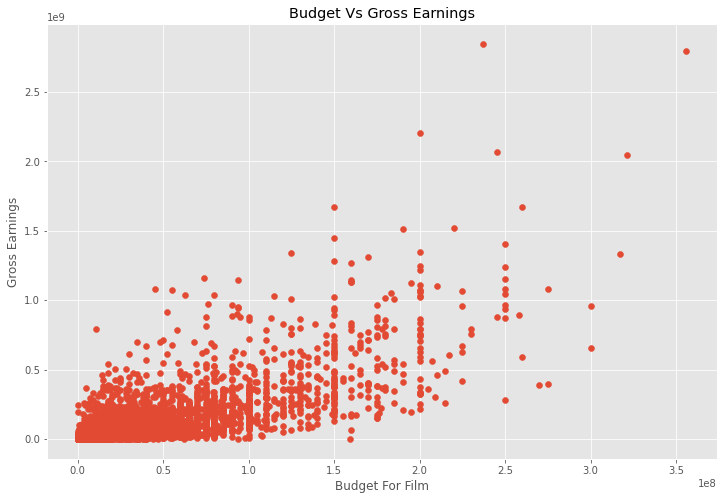

In [149]:
# Testing if Budget & Company have high correlation.

plt.scatter(x = df['budget'], y = df['gross'])

plt.title("Budget Vs Gross Earnings")

plt.xlabel("Budget For Film")

plt.ylabel("Gross Earnings")

plt.show()

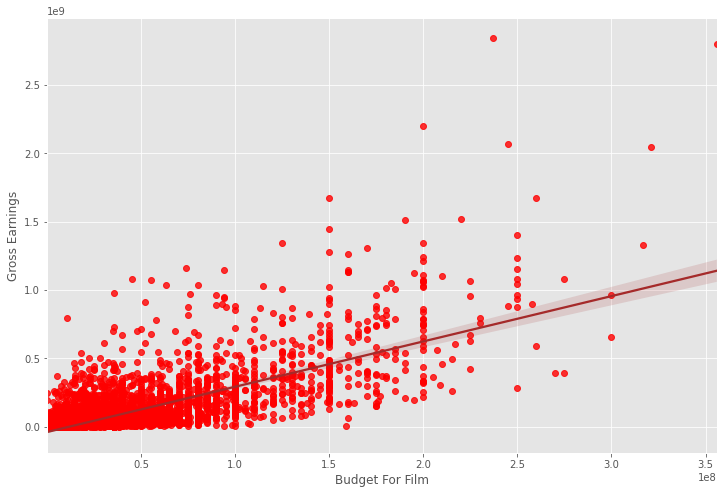

In [51]:
# Using seaborn to make the same plot.

graph = sns.regplot(x = df['budget'], y = df['gross'], data = df, scatter_kws = {'color': 'red'}, 
            line_kws = {'color': 'brown'})

graph.set(xlabel = "Budget For Film", ylabel = "Gross Earnings")
plt.show()

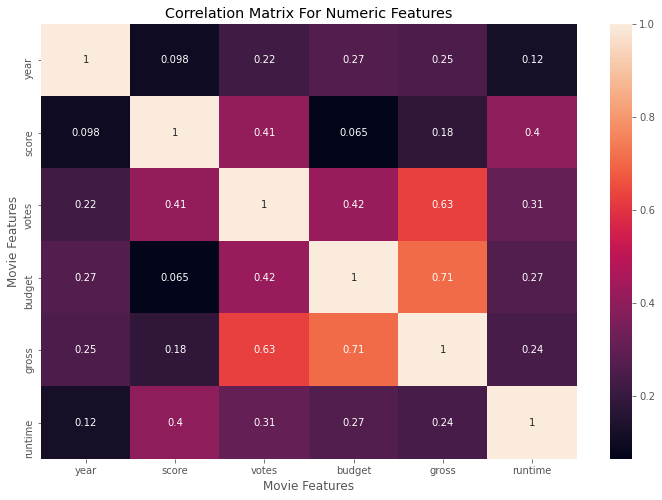

In [57]:
# Let's start looking at correlation.

correlation_matrix = df.corr(method = 'pearson')   # pearson, kendall, spearman

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix For Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

In [70]:
df_numerized = df

for col_name in df_numerized:
    if df[col_name].dtype == "object":
        df[col_name] = df[col_name].astype("category")
        df[col_name] = df[col_name].cat.codes  # .cat.codes are categorical values. Still representing category, though.
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,The Blue Lagoon,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,Star Wars: Episode V - The Empire Strikes Back,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,Airplane!,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,Caddyshack,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0


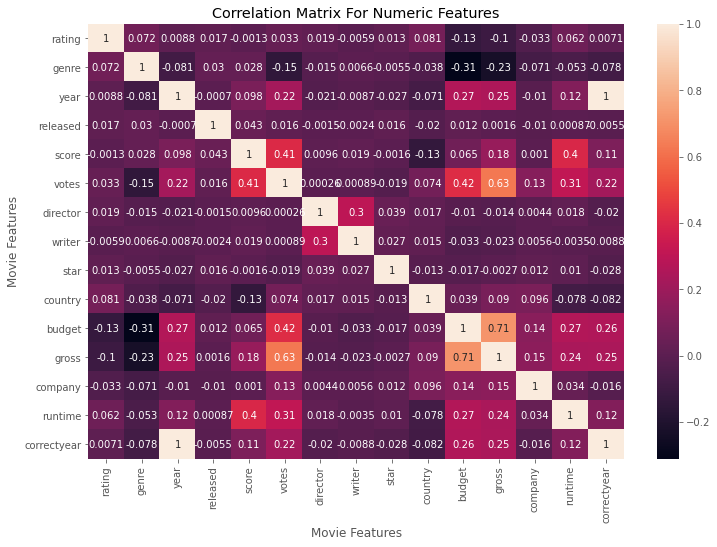

In [61]:
correlation_matrix = df_numerized.corr(method = 'pearson')   # pearson, kendall, spearman

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix For Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

In [69]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack() #Correlations by column.

corr_pairs.head()

rating  rating      1.000000
        genre       0.072423
        year        0.008779
        released    0.016613
        score      -0.001314
dtype: float64

In [68]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

genre   budget   -0.310566
budget  genre    -0.310566
gross   genre    -0.230267
genre   gross    -0.230267
        votes    -0.145307
dtype: float64

In [67]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

# Votes & Budget have the highest correlation to gross earnings!

votes        gross          0.628713
gross        votes          0.628713
budget       gross          0.711270
gross        budget         0.711270
correctyear  year           0.997295
year         correctyear    0.997295
rating       rating         1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64